In [ ]:
#conda install -c conda-forge imbalanced-learn

In [1]:
#conda install -c conda-forge xgboost

In [1]:
import sklearn as sklearn
import pandas as pd
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading csv file as pandas dataframe
input_data=pd.read_csv('coding_round_data.csv')
cat_col=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']
num_col=input_data.columns[0:10]
input_data[['Weekend','Revenue']]=input_data[['Weekend','Revenue']].astype('int64')
input_data[cat_col]=input_data[cat_col].astype("category")
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
ct = ColumnTransformer([("power_trans", PowerTransformer(), slice(0,9)),("ohe", OneHotEncoder(handle_unknown='ignore', sparse=False), slice(10,16))],remainder='passthrough')
#ct = ColumnTransformer([("MinMaxScaler", MinMaxScaler(), slice(0,10)),("ohe", OneHotEncoder(handle_unknown='ignore', sparse=False), slice(10,16))],remainder='passthrough')
ct.fit_transform(input_data)
input_ready_2=pd.DataFrame(ct.fit_transform(input_data))


In [4]:
input_ready_2.columns=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'SpecialDay', 'Weekend', 'Revenue']

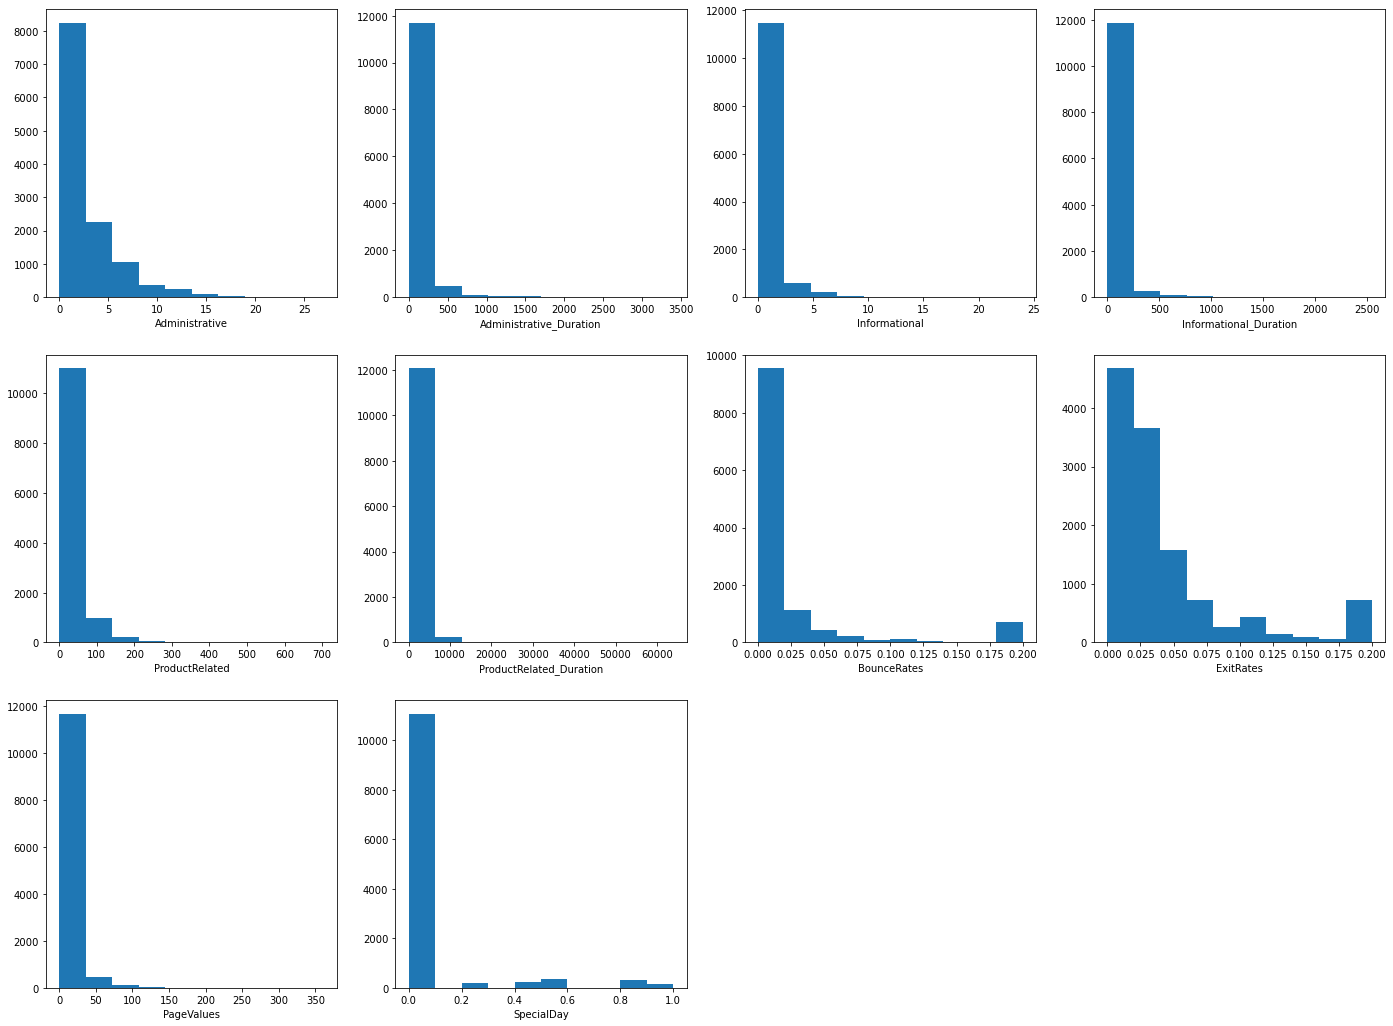

In [5]:
plt.figure(figsize=(24,18))
for i in range(0,10):
    plt.subplot(3,4,i+1)
    plt.hist(input_data.iloc[:,i])
    plt.xlabel(input_data.columns[i])

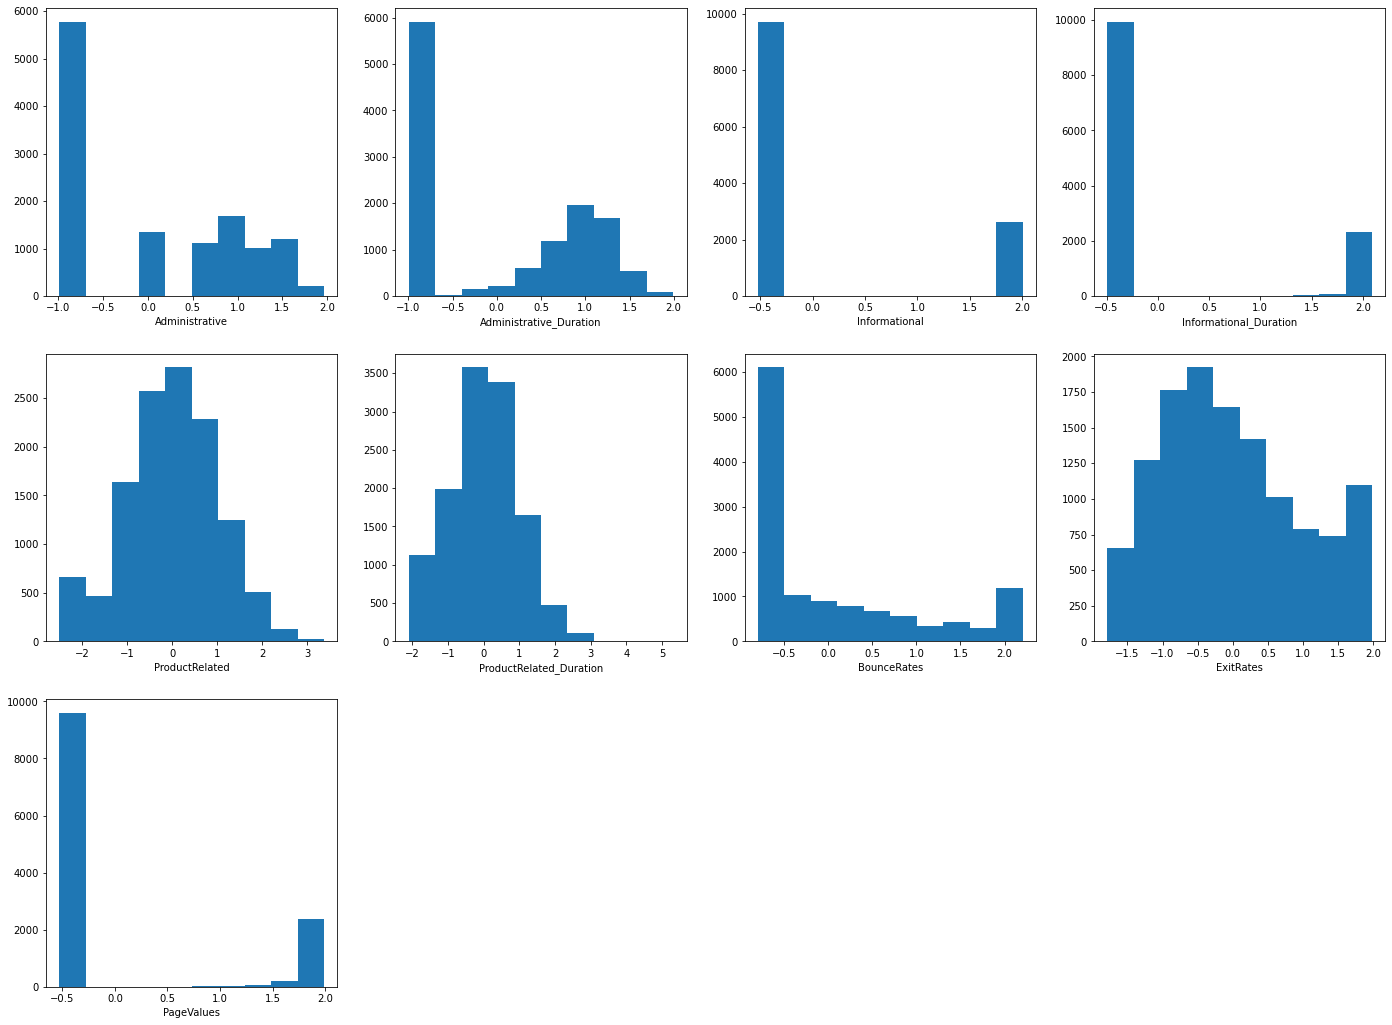

In [6]:
plt.figure(figsize=(24,18))
for i in range(0,9):
    plt.subplot(3,4,i+1)
    plt.hist(input_ready_2.iloc[:,i])
    plt.xlabel(input_ready_2.columns[i])

In [7]:
from sklearn.model_selection import train_test_split
input_train, input_test= train_test_split(input_ready_2, test_size=1/5, random_state=42)
input_train.reset_index(inplace=True)
input_test.reset_index(inplace=True)
x_train=input_train.iloc[:,0:75]
y_train=input_train.iloc[:,75]
x_test=input_test.iloc[:,0:75]
y_test=input_test.iloc[:,75]
print('no.  of train instances: ',len(x_train.index))
print('no.  of test instances: ',len(x_test.index))

no.  of train instances:  9864
no.  of test instances:  2466


In [8]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

sm_strategy=0.5
rus = RandomUnderSampler(random_state=0)# fit predictor and target variable
ros = RandomOverSampler(random_state=0)
comb_over=RandomOverSampler(random_state=0,sampling_strategy=sm_strategy)
comb_under=RandomUnderSampler(random_state=42)
smote=SMOTE(sampling_strategy='minority')
tome=TomekLinks(sampling_strategy='majority')

x_rus, y_rus = rus.fit_resample(x_train, y_train)
x_ros, y_ros = ros.fit_resample(x_train, y_train)
x_comb, y_comb = comb_over.fit_resample(x_train, y_train)
x_comb, y_comb = comb_under.fit_resample(x_comb, y_comb)
x_tome, y_tome = tome.fit_resample(x_train, y_train)
x_tome, y_tome = ros.fit_resample(x_tome, y_tome)
x_smote, y_smote = smote.fit_resample(x_train, y_train)
x_smote, y_smote = ros.fit_resample(x_smote, y_smote)

(array([8367.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8367.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

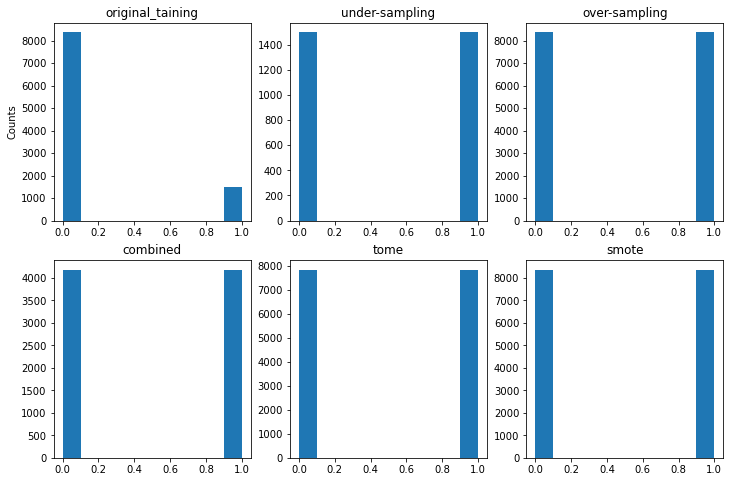

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(2, 3, 1)
plt.title('original_taining')
plt.hist(y_train)
plt.ylabel('Counts')
plt.subplot(2, 3, 2)
plt.title('under-sampling')
plt.hist(y_rus)
plt.subplot(2, 3, 3)
plt.title('over-sampling')
plt.hist(y_ros)
plt.subplot(2, 3, 4)
plt.title('combined')
plt.hist(y_comb)
plt.subplot(2, 3, 5)
plt.title('tome')
plt.hist(y_tome)
plt.subplot(2, 3, 6)
plt.title('smote')
plt.hist(y_smote)

C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


avg cv f1 score: 0.7942129677167509
F1-scores for class 0 and 1 on test sets are :  [0.56594427 0.37688889]


C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


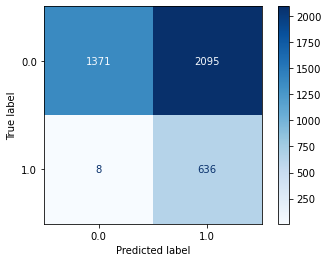

In [16]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
clf_lsvc = LinearSVC(random_state=0,tol=1e-5,C=1,max_iter=10000)
cv=cross_validate(clf_lsvc, x_rus, y_rus, cv=5,scoring='f1_weighted',return_estimator='true')

print('avg cv f1 score:',cv['test_score'].mean())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, cv['estimator'][0].predict(x_test), average=None))
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,cmap=plt.cm.Blues)

avg cv f1 score: 0.5208818606976917
F1-scores for class 0 and 1 on test sets are :  [0.73910899 0.25737015]


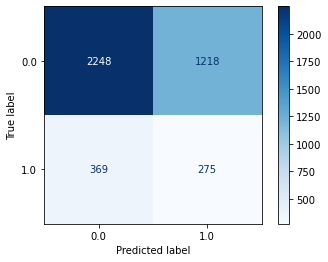

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=10)
from sklearn.model_selection import cross_validate
cv=cross_validate(clf_neigh, x_rus, y_rus, cv=5,scoring='f1_weighted',return_estimator='true')
print('avg cv f1 score:',cv['test_score'].mean())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, cv['estimator'][0].predict(x_test), average=None))
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,cmap=plt.cm.Blues)

avg cv f1 score: 0.5681229234062608
F1-scores for class 0 and 1 on test sets are :  [0.68843251 0.29647245]


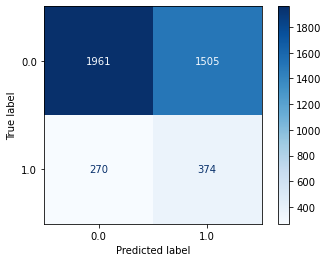

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
clf_svc = SVC(random_state=0,gamma='auto',C=10)
cv=cross_validate(clf_svc, x_rus, y_rus, cv=5,scoring='f1_weighted',return_estimator='true')

print('avg cv f1 score:',cv['test_score'].mean())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, cv['estimator'][0].predict(x_test), average=None))
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,cmap=plt.cm.Blues)

avg cv f1 score: 0.8393622408374138
F1-scores for class 0 and 1 on test sets are :  [0.90752688 0.64795322]


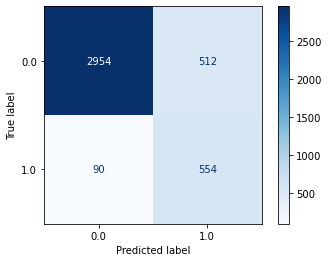

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
clf_gbrt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=5, random_state=0)
cv=cross_validate(clf_gbrt, x_rus, y_rus, cv=5,scoring='f1_weighted',return_estimator='true')

print('avg cv f1 score:',cv['test_score'].mean())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, cv['estimator'][0].predict(x_test), average=None))
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,cmap=plt.cm.Blues)

[18:40:41] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:43] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:44] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:46] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

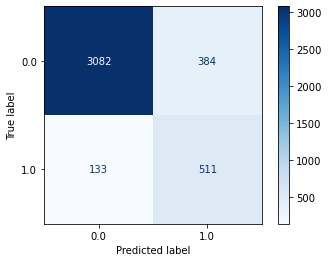

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
clf_xgb = XGBClassifier(eta=0.5,max_depth=20,gamma=100,use_label_encoder=False)
cv=cross_validate(clf_xgb, x_comb, y_comb, cv=5,scoring='f1_weighted',return_estimator='true')

print('avg cv f1 score:',cv['test_score'].mean())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, cv['estimator'][0].predict(x_test), average=None))
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,cmap=plt.cm.Blues)

avg cv f1 score: 0.9037916860392528
F1-scores for class 0 and 1 on test sets are :  [0.91861648 0.68      ]
confusion matrix for test is shwon below : 


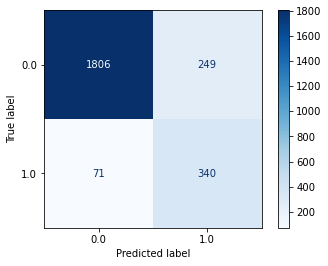

In [45]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
clf = RandomForestClassifier(max_depth=10, random_state=0)
cv=cross_validate(clf, x_ros, y_ros, cv=5,scoring='f1_weighted',return_estimator='true')

print('avg cv f1 score:',cv['test_score'].mean())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, cv['estimator'][0].predict(x_test), average=None))
print('confusion matrix for test is shwon below : ')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,cmap=plt.cm.Blues)

f1 score of best estimator: 0.925934348236224
F1-scores for class 0 and 1 on test sets are :  [0.90455137 0.66237351]


RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_leaf=0.001, n_jobs=6)

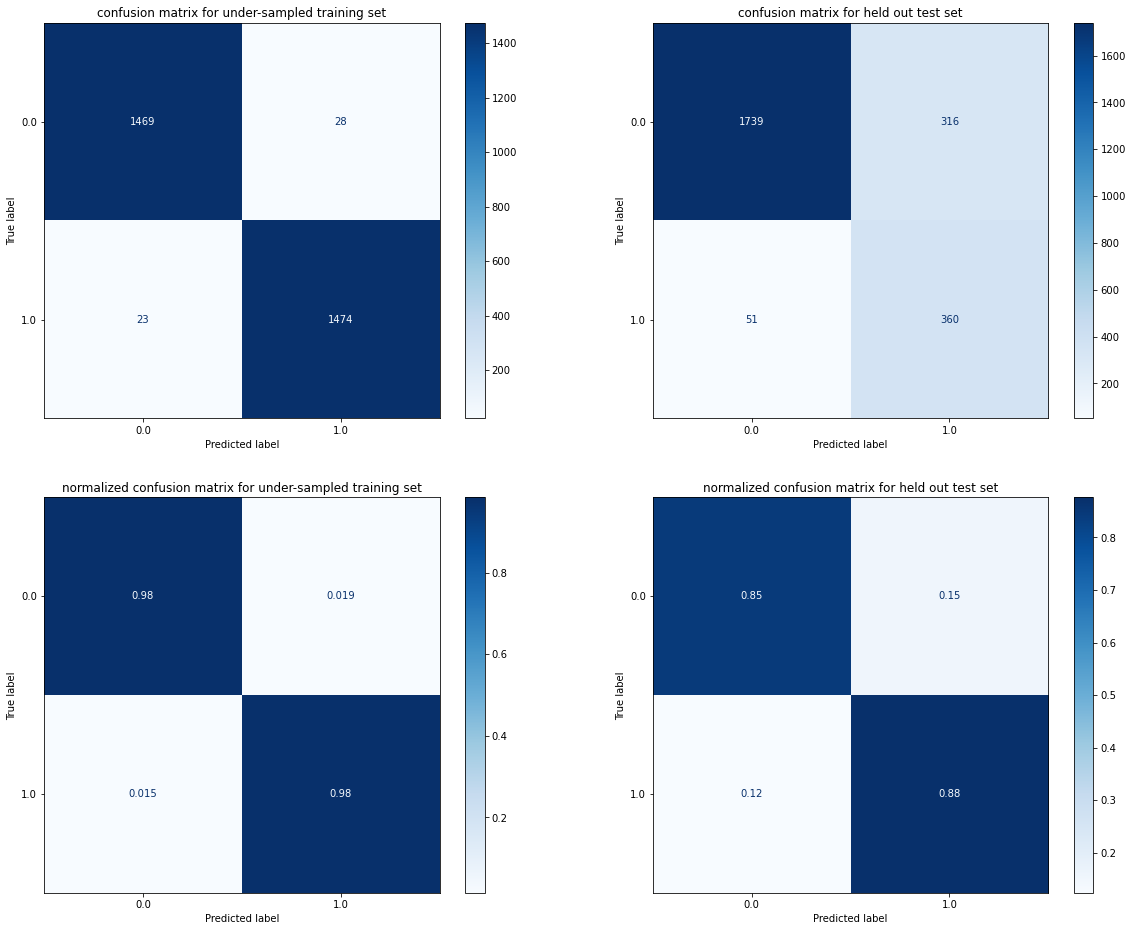

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay
rfcl = RandomForestClassifier()
parameters = {'n_estimators':[10,50,100,200],'bootstrap': [True, False],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[4,12,16,20,30,50],'min_samples_split':[2,10,40,80],'min_samples_leaf':[0.0001,0.001,0.01] ,'n_jobs':[6]}
clf = RandomizedSearchCV(rfcl, parameters,n_iter=800,cv=5,scoring='roc_auc',random_state=42)
search = clf.fit(x_rus, y_rus)
print('f1 score of best estimator:',search.cv_results_['mean_test_score'].max())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, search.best_estimator_.predict(x_test), average=None))

plt.figure(figsize=[20,16])
ax1=plt.subplot(2,2,1)
plt.title('confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_rus,y_rus,normalize=None,ax=ax1,cmap=plt.cm.Blues)
ax2=plt.subplot(2,2,2)
plt.title('confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_test,y_test,normalize=None,ax=ax2,cmap=plt.cm.Blues)
ax3=plt.subplot(2,2,3)
plt.title('normalized confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_rus,y_rus,normalize='true',ax=ax3,cmap=plt.cm.Blues)
ax4=plt.subplot(2,2,4)
plt.title('normalized confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_test,y_test,normalize='true',ax=ax4,cmap=plt.cm.Blues)


search.best_estimator_

f1 score of best estimator: 0.925939441393273
F1-scores for class 0 and 1 on test sets are :  [0.9058854  0.66232558]


RandomForestClassifier(bootstrap=False, max_depth=35, min_samples_leaf=0.0005,
                       min_samples_split=15, n_estimators=200, n_jobs=6)

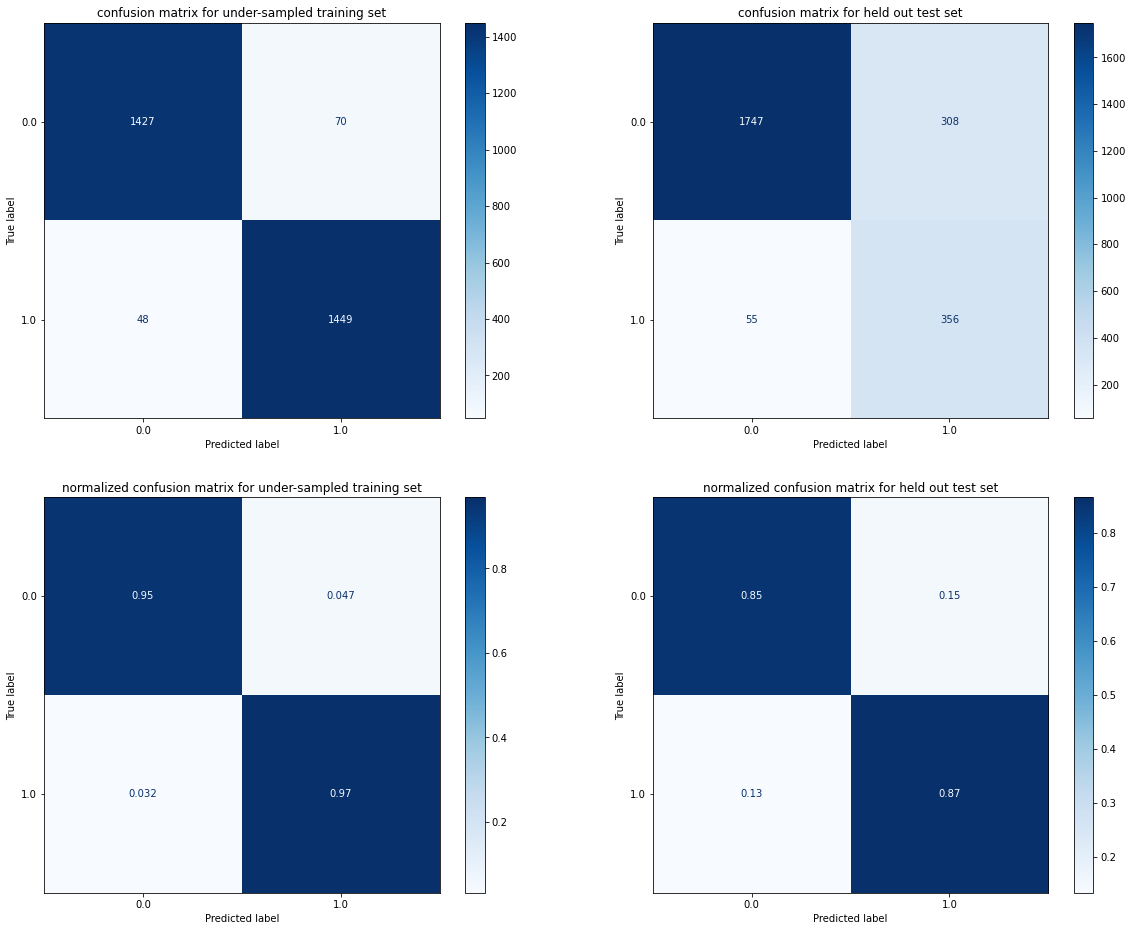

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
rfcl = RandomForestClassifier()
parameters = {'n_estimators':[150,180,200,220,240],'bootstrap': [False],'max_features':['auto'],'max_depth':[20,25,30,35,40],'min_samples_split':[5,10,15,20],'min_samples_leaf':[0.0001,0.0005,0.001,0.005,0.01] ,'n_jobs':[6]}
clf = GridSearchCV(rfcl, parameters,cv=5,scoring='roc_auc')
search_gr = clf.fit(x_rus, y_rus)
print('f1 score of best estimator:',search_gr.cv_results_['mean_test_score'].max())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, search_gr.best_estimator_.predict(x_test), average=None))

plt.figure(figsize=[20,16])
ax1=plt.subplot(2,2,1)
plt.title('confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_rus,y_rus,normalize=None,ax=ax1,cmap=plt.cm.Blues)
ax2=plt.subplot(2,2,2)
plt.title('confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_test,y_test,normalize=None,ax=ax2,cmap=plt.cm.Blues)
ax3=plt.subplot(2,2,3)
plt.title('normalized confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_rus,y_rus,normalize='true',ax=ax3,cmap=plt.cm.Blues)
ax4=plt.subplot(2,2,4)
plt.title('normalized confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_test,y_test,normalize='true',ax=ax4,cmap=plt.cm.Blues)


search_gr.best_estimator_

balanced_accuracy of best estimator: 0.8629912643865181
F1-scores for class 0 and 1 on test sets are :  [0.9049469 0.6573296]


BalancedRandomForestClassifier(max_depth=20, min_samples_leaf=0.0001,
                               n_estimators=200, n_jobs=6,
                               sampling_strategy='not minority')

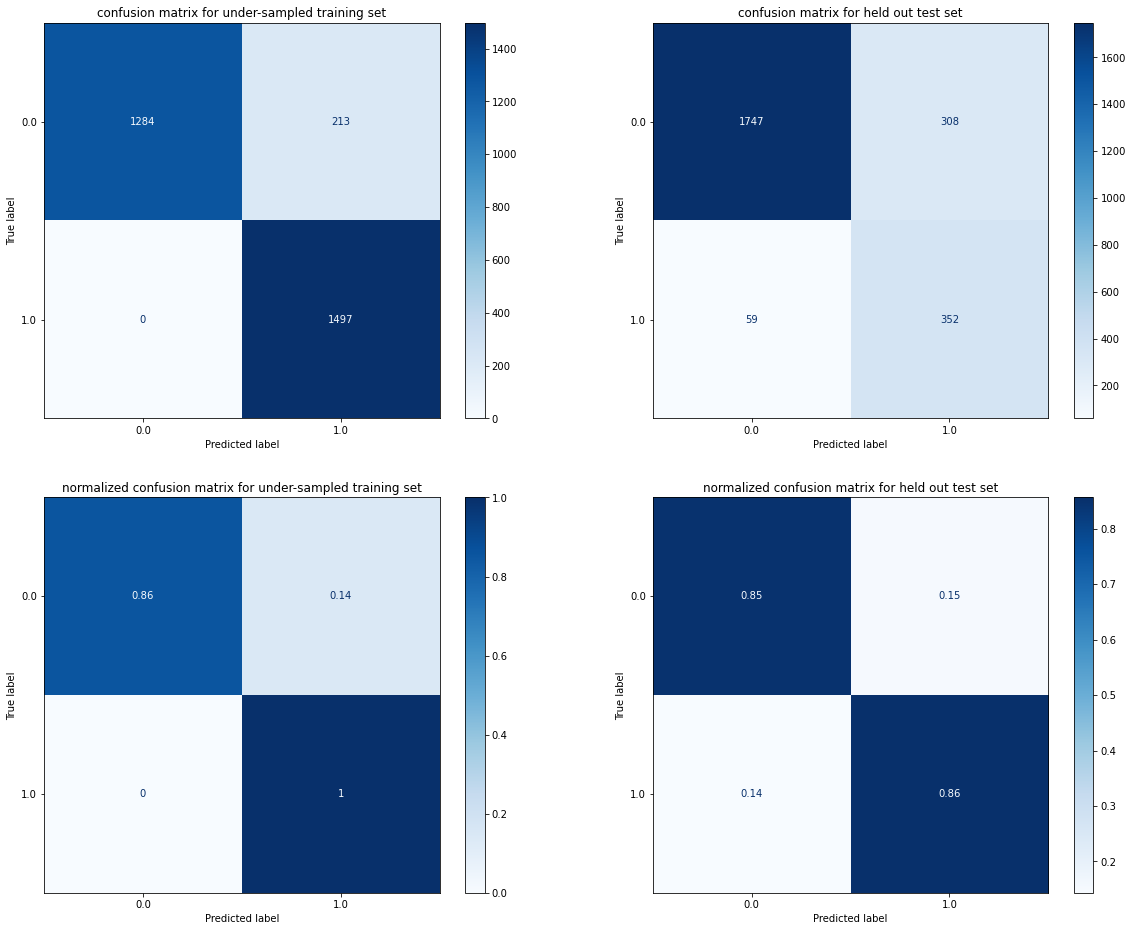

In [61]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
rfcl = BalancedRandomForestClassifier()
parameters = {'n_estimators':[10,50,100,200],'bootstrap': [True, False],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[4,12,16,20,30,50],'sampling_strategy':['not minority'],'min_samples_split':[2,10,40,80],'min_samples_leaf':[0.0001,0.001,0.01] ,'n_jobs':[6]}
clf = RandomizedSearchCV(rfcl, parameters,n_iter=1000,cv=5,scoring='balanced_accuracy',random_state=42)
search = clf.fit(x_train, y_train)
print('balanced_accuracy of best estimator:',search.cv_results_['mean_test_score'].max())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, search.best_estimator_.predict(x_test), average=None))

plt.figure(figsize=[20,16])
ax1=plt.subplot(2,2,1)
plt.title('confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_rus,y_rus,normalize=None,ax=ax1,cmap=plt.cm.Blues)
ax2=plt.subplot(2,2,2)
plt.title('confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_test,y_test,normalize=None,ax=ax2,cmap=plt.cm.Blues)
ax3=plt.subplot(2,2,3)
plt.title('normalized confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_rus,y_rus,normalize='true',ax=ax3,cmap=plt.cm.Blues)
ax4=plt.subplot(2,2,4)
plt.title('normalized confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_test,y_test,normalize='true',ax=ax4,cmap=plt.cm.Blues)


search.best_estimator_

In [65]:
search.best_estimator_.min_samples_leaf


0.0001

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
rfcl = BalancedRandomForestClassifier()
parameters = {'n_estimators':[160,180,200,220,240],'bootstrap': [False],'max_features':['auto'],'max_depth':[15,20,25],'sampling_strategy':['not minority'],'min_samples_split':[2,4,6,8],'min_samples_leaf':[0.0005,0.0001,0.00005] ,'n_jobs':[4]}
clf = GridSearchCV(rfcl, parameters,cv=5,scoring='balanced_accuracy')
search_gr = clf.fit(x_train, y_train)
print('balanced_accuracy of best estimator:',search_gr.cv_results_['mean_test_score'].max())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, search_gr.best_estimator_.predict(x_test), average=None))

plt.figure(figsize=[20,16])
ax1=plt.subplot(2,2,1)
plt.title('confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_rus,y_rus,normalize=None,ax=ax1,cmap=plt.cm.Blues)
ax2=plt.subplot(2,2,2)
plt.title('confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_test,y_test,normalize=None,ax=ax2,cmap=plt.cm.Blues)
ax3=plt.subplot(2,2,3)
plt.title('normalized confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_rus,y_rus,normalize='true',ax=ax3,cmap=plt.cm.Blues)
ax4=plt.subplot(2,2,4)
plt.title('normalized confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_test,y_test,normalize='true',ax=ax4,cmap=plt.cm.Blues)


search_gr.best_estimator_